# How can restaurant hook potential Yelp reviews with high-stars
- Data Source: https://www.yelp.com/dataset/documentation/main

In [1]:
import re
import warnings
import pandas as pd
import seaborn as sns
sns.set_style(style="white")

warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
yelp = pd.read_csv("Data/yelp.csv")
yelp = yelp[yelp.review_cool.map(type) != str].dropna(how="any")
yelp.review_cool = yelp.review_cool.astype("float")
yelp.head(2)

,business_id,review_cool,review_funny,review_id,review_stars,review,review_useful,user_id,review_len,review_afinn_score,...,checkin_count,var_checkin,b_tip_compliment_count,b_tip_len,b_tip_afinn_score,b_tip_polarity,b_tip_compound,b_tip_positive,b_tip_negative,b_tip_neutral
0,ujmEBvifdJM6h6RLv4wQIg,0.0,1,Q1sbwvVQXV2734tPgoKj4Q,1.0,Total bill for this horrible service? Over $8G...,6.0,hG7b0MtEbXx5QzbzE6C_VA,204.0,-2.0,...,1599.0,10.045591,0.125,87.337500,0.420903,0.164938,0.158531,0.165675,0.067,0.767312
1,xpEq8x5caXFm2lmjQ51rVQ,0.0,0,D4_FpPSPRNtAj1964vXFPQ,2.0,Unable to get their over the air signal. So wh...,2.0,hG7b0MtEbXx5QzbzE6C_VA,327.0,1.0,...,105.0,1783.739320,0.000,55.833333,1.333333,0.272751,0.369767,0.233500,0.000,0.766500


## 1. Review

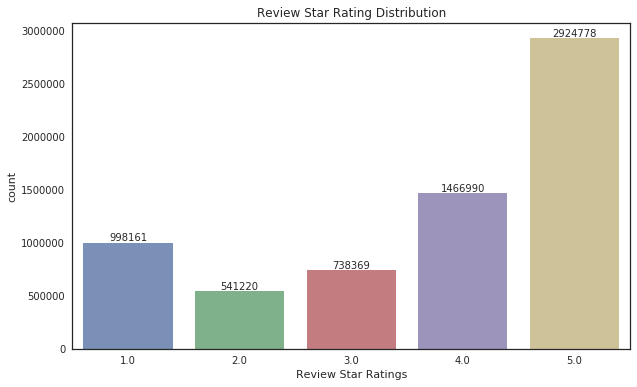

In [3]:
x=yelp['review_stars'].value_counts()
x=x.sort_index()
plt.figure(figsize=(10,6))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Review Star Rating Distribution")
plt.ylabel('count')
plt.xlabel('Review Star Ratings')
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

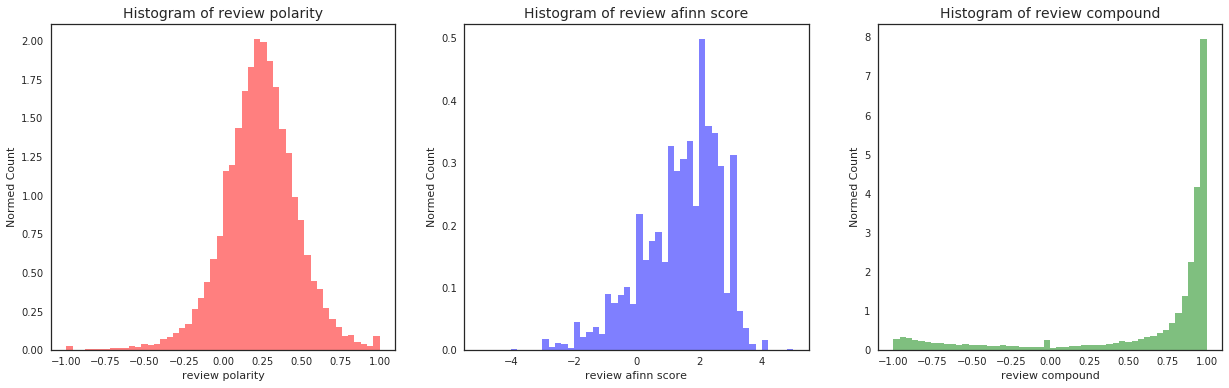

In [4]:
color = ['red', 'blue', 'green']
f = plt.figure(figsize=(21, 6))
for i, column in enumerate(['review_polarity', 'review_afinn_score', 'review_compound']):
    ax = f.add_subplot(1, 3, i + 1)
    num_bins = 50
    n, bins, patches = ax.hist(yelp[column], num_bins, facecolor= color[i], alpha=0.5, normed = True)
    ax.set_xlabel(re.sub('_', ' ', column))
    ax.set_ylabel('Normed Count')
    ax.set_title('Histogram of %s'%(re.sub('_', ' ', column)), fontsize=14)

Text(0,0.5,'AFINN Scores')

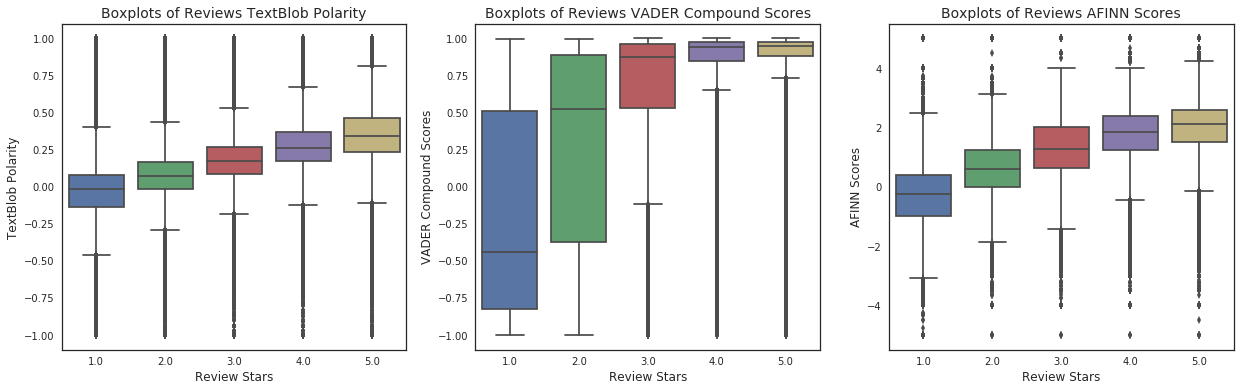

In [5]:
f = plt.figure(figsize=(21,6))
ax1 = f.add_subplot(1, 3, 1)
ax1 = sns.boxplot(x='review_stars', y='review_polarity', data=yelp)
ax1.set_title("Boxplots of Reviews TextBlob Polarity", fontsize = 14)
ax1.set_xlabel("Review Stars", fontsize = 12)
ax1.set_ylabel("TextBlob Polarity", fontsize = 12)
ax2 = f.add_subplot(1, 3, 2)
ax2 = sns.boxplot(x='review_stars', y='review_compound', data=yelp)
ax2.set_title("Boxplots of Reviews VADER Compound Scores", fontsize = 14)
ax2.set_xlabel("Review Stars", fontsize = 12)
ax2.set_ylabel("VADER Compound Scores", fontsize = 12)
ax3 = f.add_subplot(1, 3, 3)
ax3 = sns.boxplot(x='review_stars', y='review_afinn_score', data=yelp)
ax3.set_title("Boxplots of Reviews AFINN Scores", fontsize = 14)
ax3.set_xlabel("Review Stars", fontsize = 12)
ax3.set_ylabel("AFINN Scores", fontsize = 12)

In [6]:
review_analysis = yelp[['review_stars','review_cool', 'review_funny', 'review_useful', 
                        'review_len','review_afinn_score', 'review_polarity', 'review_compound',
                        'review_positive', 'review_negative', 'review_neutral']].corr()

Text(0.5,1,'Correlation Heatmap over Review Dataset')

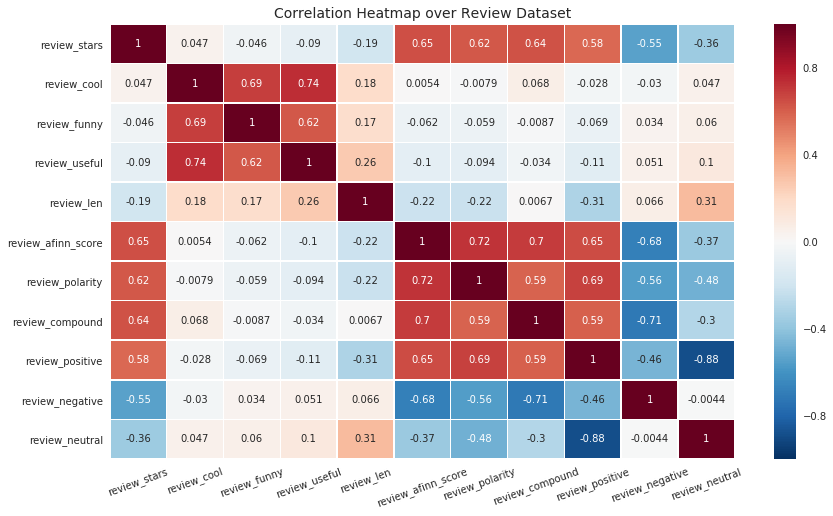

In [7]:
fig, ax = plt.subplots(figsize=(14, 8))

ax = sns.heatmap(data=review_analysis, annot=True, linewidths=.5)
ax.set_xticklabels(review_analysis.columns, rotation=20)
ax.set_title('Correlation Heatmap over Review Dataset', fontsize=14)

## 2. Tip

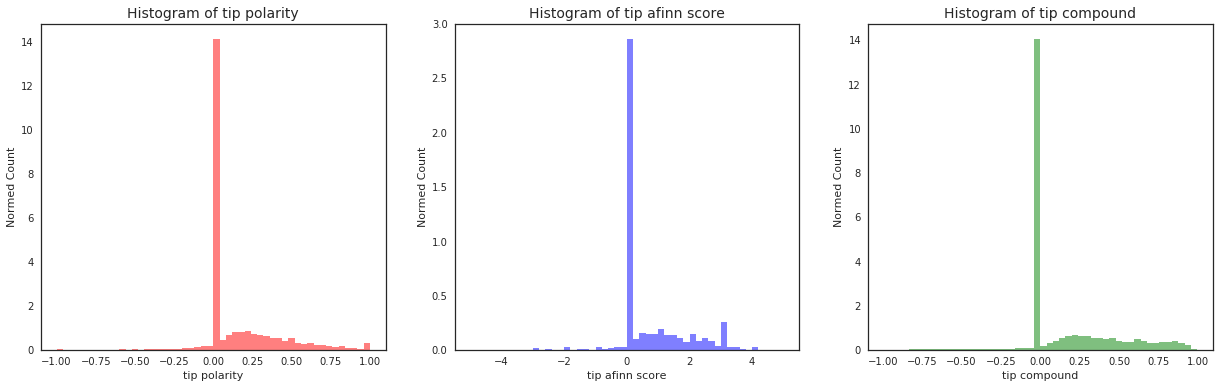

In [8]:
color = ['red', 'blue', 'green']
f = plt.figure(figsize=(21, 6))
for i, column in enumerate(['tip_polarity', 'tip_afinn_score', 'tip_compound']):
    ax = f.add_subplot(1, 3, i + 1)
    num_bins = 50
    n, bins, patches = ax.hist(yelp[column], num_bins, facecolor= color[i], alpha=0.5, normed = True)
    ax.set_xlabel(re.sub('_', ' ', column))
    ax.set_ylabel('Normed Count')
    ax.set_title('Histogram of %s'%(re.sub('_', ' ', column)), fontsize=14)

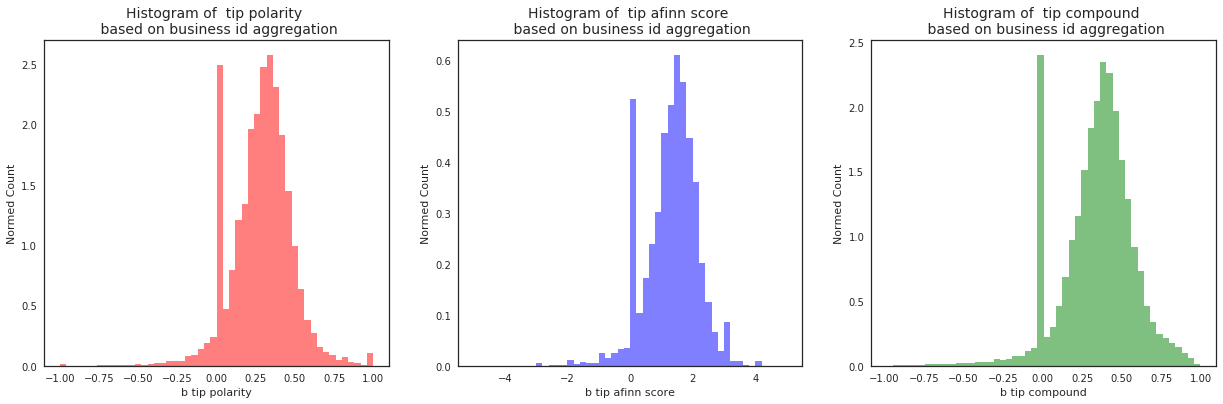

In [9]:
f = plt.figure(figsize=(21, 6))
for i, column in enumerate(['b_tip_polarity', 'b_tip_afinn_score', 'b_tip_compound']):
    ax = f.add_subplot(1, 3, i + 1)
    num_bins = 50
    n, bins, patches = ax.hist(yelp[column], num_bins, facecolor= color[i], alpha=0.5, normed = True)
    ax.set_xlabel(re.sub('_', ' ', column))
    ax.set_ylabel('Normed Count')
    ax.set_title('Histogram of %s \n based on business id aggregation'%(re.sub('_', ' ', column[1:])), fontsize=14)

Text(0,0.5,'AFINN Scores')

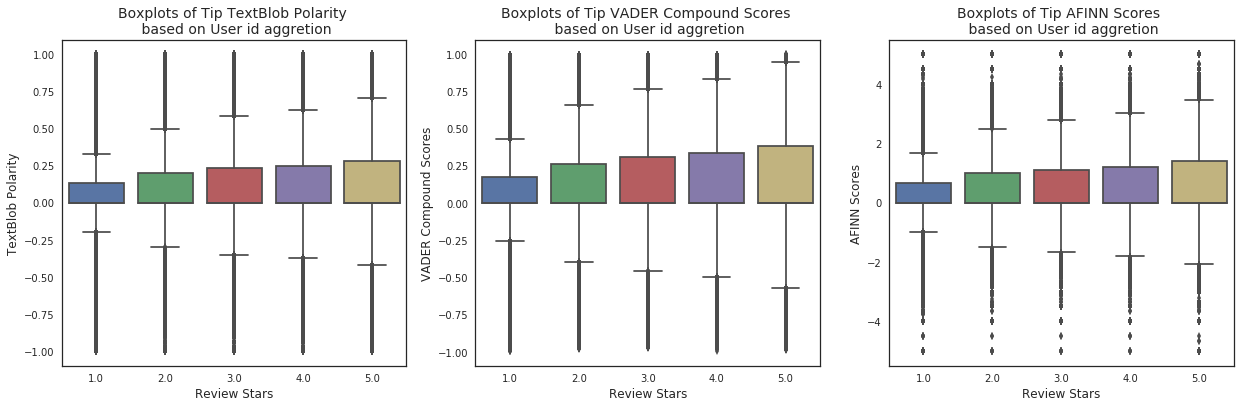

In [10]:
f = plt.figure(figsize=(21,6))
ax1 = f.add_subplot(1, 3, 1)
ax1 = sns.boxplot(x='review_stars', y='tip_polarity', data=yelp)
ax1.set_title("Boxplots of Tip TextBlob Polarity \n based on User id aggretion", fontsize = 14)
ax1.set_xlabel("Review Stars", fontsize = 12)
ax1.set_ylabel("TextBlob Polarity", fontsize = 12)
ax2 = f.add_subplot(1, 3, 2)
ax2 = sns.boxplot(x='review_stars', y='tip_compound', data=yelp)
ax2.set_title("Boxplots of Tip VADER Compound Scores \n based on User id aggretion", fontsize = 14)
ax2.set_xlabel("Review Stars", fontsize = 12)
ax2.set_ylabel("VADER Compound Scores", fontsize = 12)
ax3 = f.add_subplot(1, 3, 3)
ax3 = sns.boxplot(x='review_stars', y='tip_afinn_score', data=yelp)
ax3.set_title("Boxplots of Tip AFINN Scores \n based on User id aggretion", fontsize = 14)
ax3.set_xlabel("Review Stars", fontsize = 12)
ax3.set_ylabel("AFINN Scores", fontsize = 12)

Text(0,0.5,'AFINN Scores')

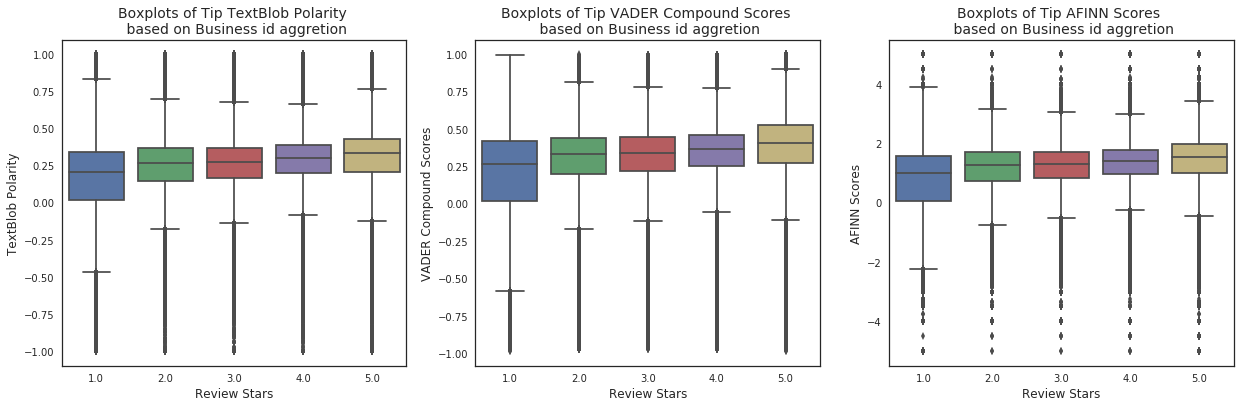

In [11]:
f = plt.figure(figsize=(21,6))
ax1 = f.add_subplot(1, 3, 1)
ax1 = sns.boxplot(x='review_stars', y='b_tip_polarity', data=yelp)
ax1.set_title("Boxplots of Tip TextBlob Polarity \n based on Business id aggretion", fontsize = 14)
ax1.set_xlabel("Review Stars", fontsize = 12)
ax1.set_ylabel("TextBlob Polarity", fontsize = 12)
ax2 = f.add_subplot(1, 3, 2)
ax2 = sns.boxplot(x='review_stars', y='b_tip_compound', data=yelp)
ax2.set_title("Boxplots of Tip VADER Compound Scores \n based on Business id aggretion", fontsize = 14)
ax2.set_xlabel("Review Stars", fontsize = 12)
ax2.set_ylabel("VADER Compound Scores", fontsize = 12)
ax3 = f.add_subplot(1, 3, 3)
ax3 = sns.boxplot(x='review_stars', y='b_tip_afinn_score', data=yelp)
ax3.set_title("Boxplots of Tip AFINN Scores \n based on Business id aggretion", fontsize = 14)
ax3.set_xlabel("Review Stars", fontsize = 12)
ax3.set_ylabel("AFINN Scores", fontsize = 12)

## 3. User

In [12]:
review_user_subset = yelp[['review_stars', 'user_review_count', 'user_useful', 'user_funny', 'user_cool', 
                           'fans','user_stars', 'num_elite', 'num_friends']]

Text(0.5,1,'Correlation Heatmap over User Dataset')

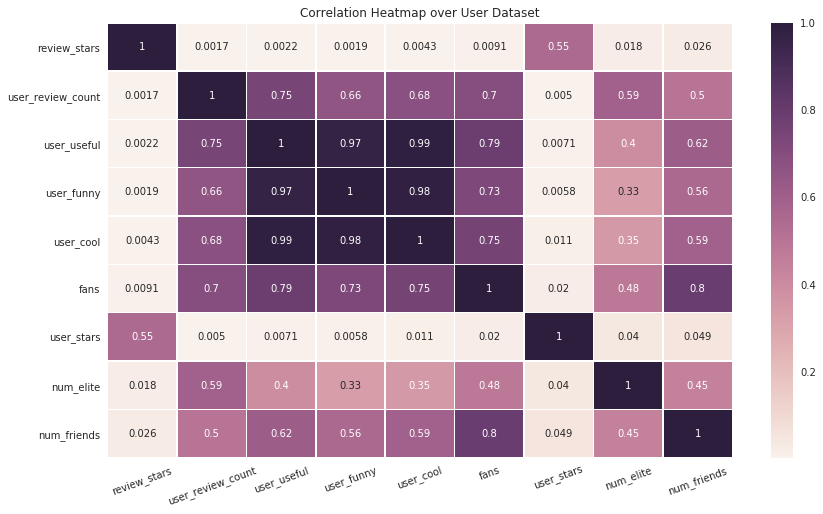

In [13]:
review_user_corr = review_user_subset.corr()
fig, ax = plt.subplots(figsize=(14, 8))
ax = sns.heatmap(data=review_user_corr, annot=True, linewidths=.5)
ax.set_xticklabels(review_user_subset.columns, rotation=20)
plt.title("Correlation Heatmap over User Dataset")

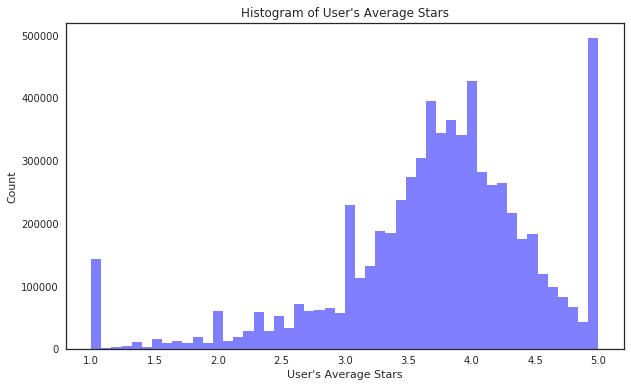

In [14]:
num_bins = 50
plt.figure(figsize=(10,6))
n,bins,patches = plt.hist(review_user_subset['user_stars'], num_bins, facecolor='blue', alpha=0.5)
plt.xlabel("User's Average Stars")
plt.ylabel('Count')
plt.title("Histogram of User's Average Stars")
plt.show()

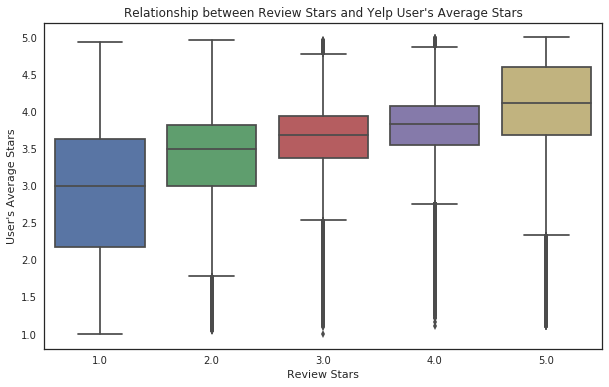

In [15]:
plt.figure(figsize=(10,6))
sns.boxplot(x = 'review_stars', y = 'user_stars', data = review_user_subset)
plt.xlabel("Review Stars")
plt.ylabel("User's Average Stars")
plt.title("Relationship between Review Stars and Yelp User's Average Stars")
plt.show()

## 4. Business

Text(0.5,1,'Boxplots of Business Stars over Review Stars')

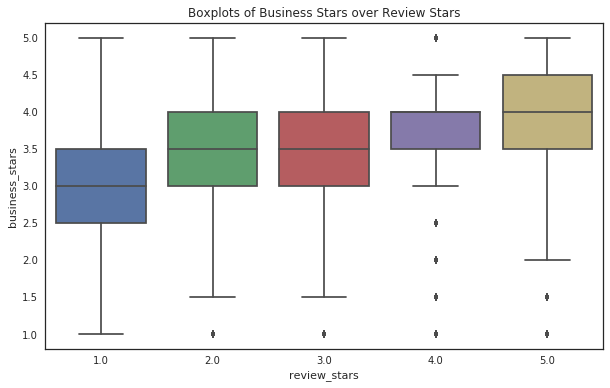

In [16]:
plt.figure(figsize=(10,6))
sns.boxplot(x='review_stars', y='business_stars', data=yelp)
plt.title("Boxplots of Business Stars over Review Stars")

In [17]:
hours = yelp[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]
hours.head()

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,24.0,24.0,24.0,24.0,24.0,24.0,24.0
1,9.0,9.0,9.0,9.0,9.0,0.0,0.0
2,24.0,24.0,24.0,24.0,24.0,24.0,24.0
3,18.0,18.0,18.0,18.0,18.0,18.0,18.0
4,15.0,15.0,15.0,15.0,16.0,16.0,0.0


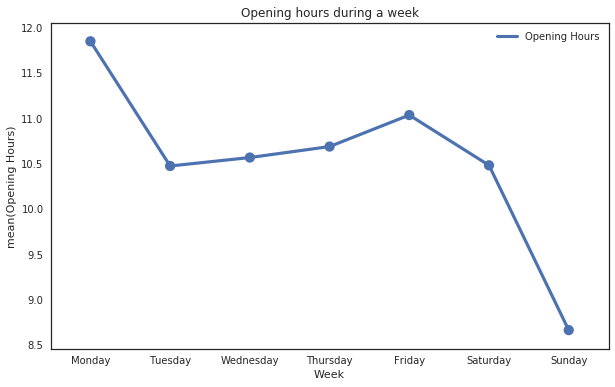

In [18]:
# The plot in the report is for all roginal non-Nan data
# This plot is for all filled-zero data, but the trends are similar

f = plt.figure(figsize=(10, 6))

sns.pointplot(x="Week", y="Opening Hours", 
              data=pd.DataFrame(hours.mean()).reset_index().rename(columns={0: "Opening Hours", "index": "Week"}))
plt.title("Opening hours during a week")
plt.legend(labels=['Opening Hours'])

## 5. Checkin

In [19]:
yelp_gbb = yelp.groupby("business_stars").mean()
yelp_gbb.head()

,review_cool,review_funny,review_stars,review_useful,review_len,review_afinn_score,review_polarity,review_compound,review_positive,review_negative,...,checkin_count,var_checkin,b_tip_compliment_count,b_tip_len,b_tip_afinn_score,b_tip_polarity,b_tip_compound,b_tip_positive,b_tip_negative,b_tip_neutral
business_stars,,,,,,,,,,,,,,,,,,,,,
1.0,0.218149,0.488845,1.081656,3.183471,805.795244,-0.520844,-0.050406,-0.308523,0.069009,0.114777,...,6.546893,29171.874655,0.011595,45.926748,-0.249825,-0.044186,-0.075989,0.042618,0.084878,0.325489
1.5,0.326864,0.624936,1.542441,2.727413,739.974452,-0.234269,-0.016064,-0.141909,0.085807,0.104519,...,157.379935,20766.333926,0.019731,73.954807,-0.078130,-0.006028,-0.025038,0.098419,0.109083,0.597649
2.0,0.370996,0.579183,2.036202,2.030612,689.830776,0.188208,0.040227,0.066184,0.109930,0.088920,...,156.695032,19101.536484,0.014507,67.444110,0.303145,0.065647,0.078667,0.138689,0.087994,0.606935
2.5,0.428982,0.555402,2.529646,1.643038,682.980457,0.610206,0.102978,0.281561,0.137352,0.074386,...,991.080775,10811.665029,0.016168,65.231128,0.661811,0.139650,0.175462,0.182477,0.069694,0.644140
3.0,0.499674,0.567247,3.033330,1.454681,654.141493,1.020320,0.164688,0.473052,0.165486,0.060037,...,1384.823025,6998.165647,0.014918,64.372835,0.962358,0.205485,0.252888,0.220901,0.056554,0.659946


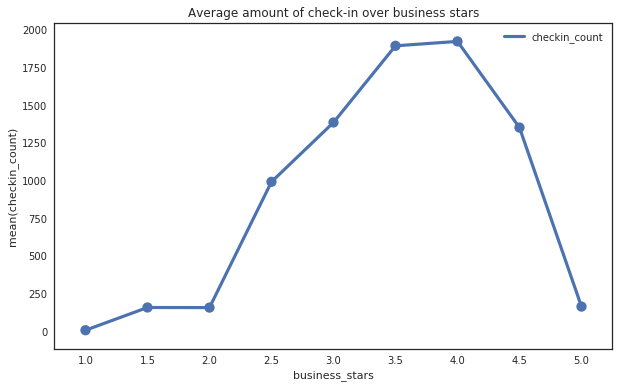

In [20]:
# Average amount of check-in over business stars

f = plt.figure(figsize=(10, 6))
sns.pointplot(x="business_stars", y="checkin_count", data=yelp_gbb.reset_index())
plt.title("Average amount of check-in over business stars")
plt.legend(labels=["checkin_count"])